In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
DATA_FILE = '../data/cleaned.csv'
df = pd.read_csv(DATA_FILE)

In [4]:
x = df.contest_num
y = df.num_results

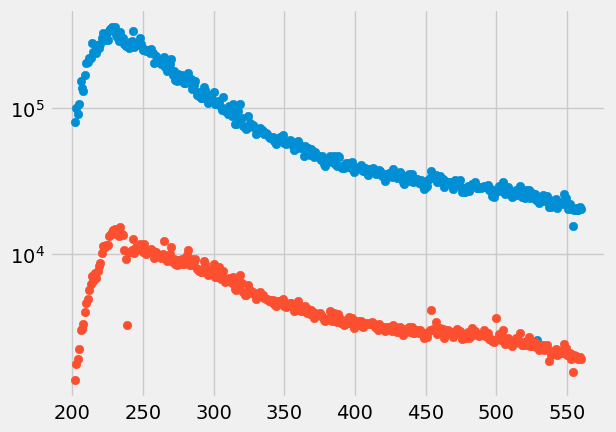

In [5]:
plt.scatter(x,y)
plt.scatter(x,df.num_hardmode)
plt.yscale('log')

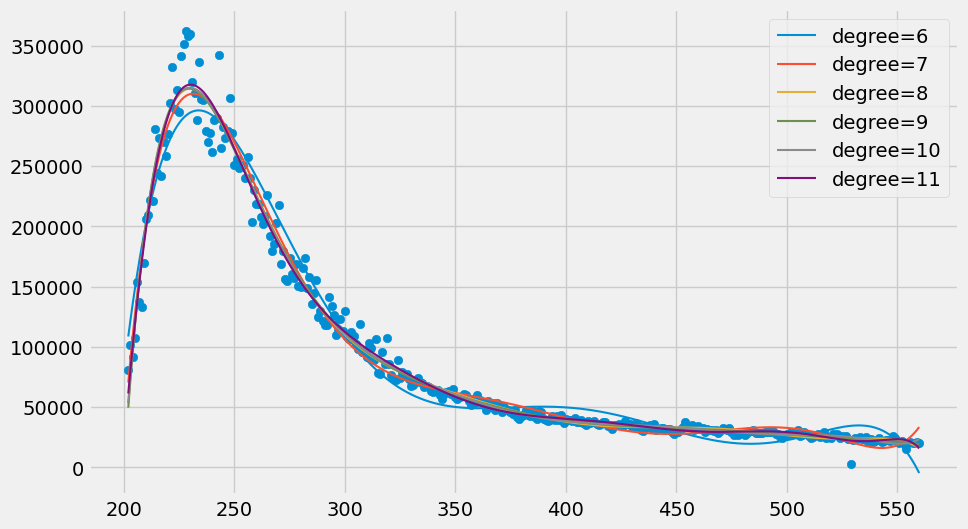

In [6]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)
for i in range(6,12):
    model = np.poly1d(np.polyfit(x, y, i))
    plt.plot(df.contest_num, model(df.contest_num),label=f'degree={i}',lw=1.5)
plt.legend()
plt.show()

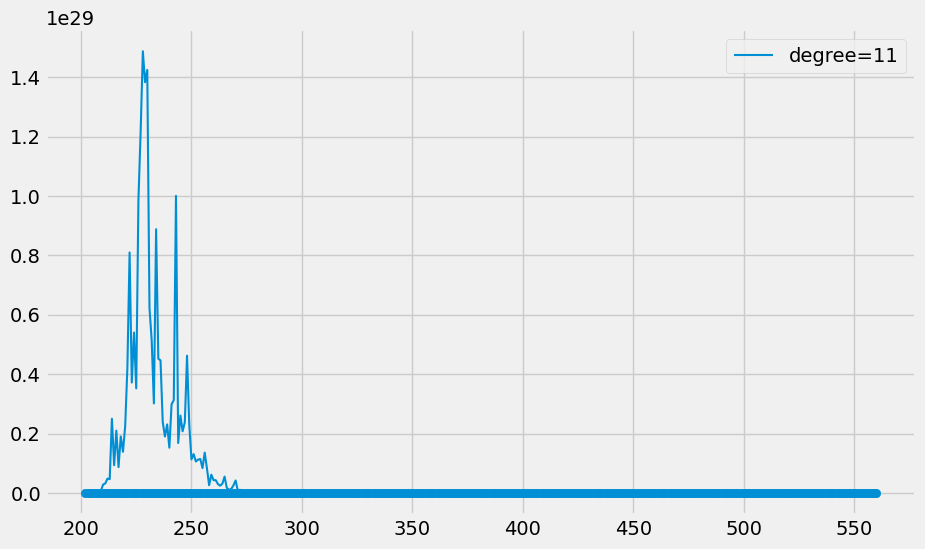

In [7]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)
model = np.poly1d(np.polyfit(x, y, 7))
plt.plot(df.contest_num, model(y),label=f'degree={i}',lw=1.5)
plt.legend()
plt.show()

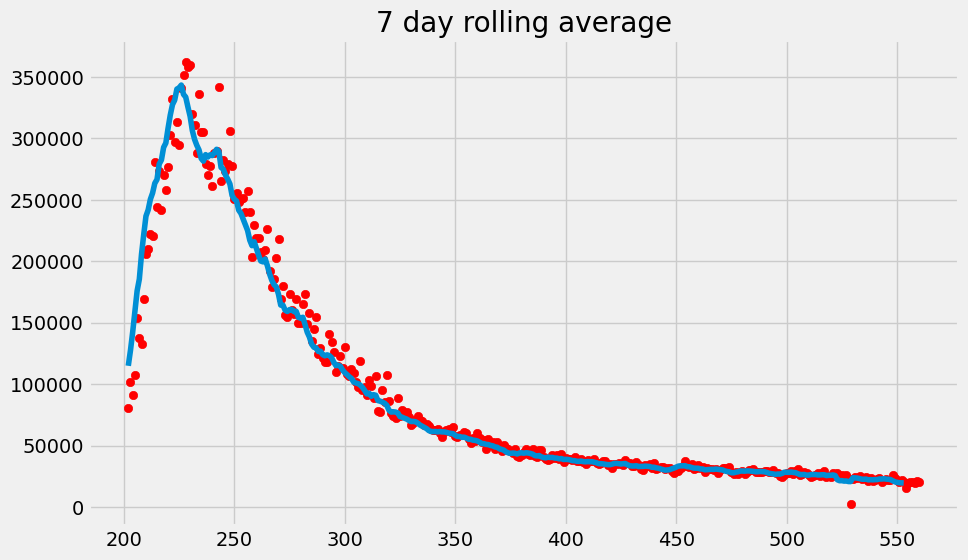

In [8]:
plt.figure(figsize = (10,6))
rolling_avg = y.rolling(7).mean()
plt.scatter(x,y,color='r')
plt.plot(x[7:],rolling_avg[7:])
plt.title('7 day rolling average')
plt.show()

In [10]:
# https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
from fitter import Fitter, get_common_distributions, get_distributions

Fitting 109 distributions:  44%|████▍     | 48/109 [00:06<00:04, 13.04it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  98%|█████████▊| 107/109 [00:36<00:04,  2.20s/it]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
invgauss,1.196274e-09,2729.850473,-1261.901752,inf,0.094351,0.708034
norminvgauss,1.196394e-09,2731.715428,-1257.945303,inf,0.094141,0.710569
invgamma,1.200057e-09,2756.267018,-1261.737580,inf,0.089499,0.765555
alpha,1.254240e-09,2765.776633,-1259.441221,inf,0.106164,0.564726
johnsonsu,1.269970e-09,2727.722743,-1254.841865,inf,0.079791,0.868881


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


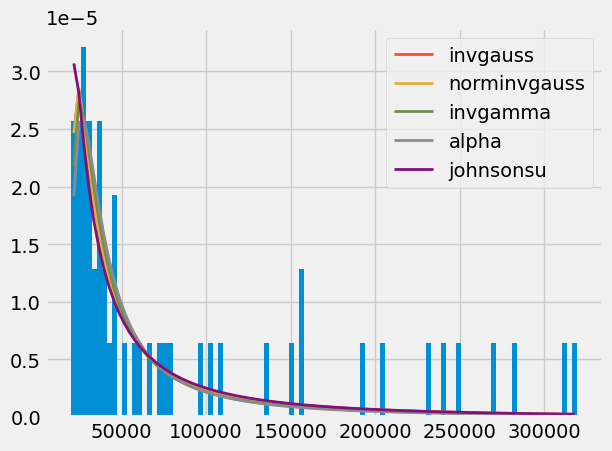

In [11]:
f = Fitter(y[::7], distributions=get_distributions())
f.fit()
f.summary()

In [12]:
f.get_best()

{'invgauss': {'mu': 3.297268481287143,
  'loc': 17044.01787061812,
  'scale': 21568.16748916259}}